## Logistic Regression (Introduction) 

Despite its name, **Logistic Regression** is a **Classification** algorithm, not a regression one. It is used to estimate the probability that an instance belongs to a particular class (e.g., probability that an email is spam).

*   **Linear Regression:** Predicts a continuous value ($y \in \mathbb{R}$). Output can be anything ($-\infty$ to $+\infty$).
*   **Logistic Regression:** Predicts a probability ($y \in [0, 1]$). It squashes the output of a linear equation between 0 and 1.

**Key Idea:** If the estimated probability is greater than 50%, the model predicts that the instance belongs to that class (labeled "1"), otherwise it predicts it belongs to the other class (labeled "0").

---

## Formalism (Math) 

How do we squash numbers into the range $[0, 1]$? We use the **Sigmoid Function** (also called the Logistic Function).

### 1. The Sigmoid Function
$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

*   If $z$ is a large positive number, $\sigma(z) \approx 1$.
*   If $z$ is a large negative number, $\sigma(z) \approx 0$.
*   If $z = 0$, $\sigma(z) = 0.5$.

### 2. Hypothesis Representation
The model first calculates a linear sum ($z = \theta^T x$), then applies the sigmoid:

$$ h_\theta(x) = \sigma(\theta_0 + \theta_1 x_1 + \dots + \theta_n x_n) $$

### 3. Cost Function (Log Loss)
We cannot use Mean Squared Error (MSE) because the Sigmoid function makes the error surface "wavy" (non-convex), meaning Gradient Descent might get stuck in a local minimum.

Instead, we use **Log Loss (Cross-Entropy Loss)**:

$$ J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} [y^{(i)}\log(h_\theta(x^{(i)})) + (1 - y^{(i)})\log(1 - h_\theta(x^{(i)}))] $$

*   If actual class $y=1$: We want $h(x) \approx 1$. If $h(x) \approx 0$, cost is huge ($-\log(0) = \infty$).
*   If actual class $y=0$: We want $h(x) \approx 0$. If $h(x) \approx 1$, cost is huge.

---

##  ROC Curve (Receiver Operating Characteristic) 

When evaluating a classifier, "Accuracy" is not enough, especially if classes are imbalanced. We need to visualize the trade-off between capturing positives and avoiding false alarms.

### Concepts:
1.  **TPR (True Positive Rate) / Recall / Sensitivity:**
    $$ TPR = \frac{TP}{TP + FN} $$ (How many actual positives did we find?)
2.  **FPR (False Positive Rate):**
    $$ FPR = \frac{FP}{FP + TN} $$ (How many negatives did we wrongly classify as positive?)

### The Curve:
*   The **ROC Curve** plots **TPR vs. FPR** at different classification thresholds (e.g., 0.1, 0.5, 0.9).
*   **AUC (Area Under the Curve):** A single number to summarize the curve.
    *   $AUC = 0.5$: Random guessing (Bad).
    *   $AUC = 1.0$: Perfect classifier.
    *   $AUC > 0.8$: Very good.

---

##  Logistic Regression (Programming) (Code)

implement this using the **Breast Cancer Wisconsin dataset** (Binary Classification: Malignant vs. Benign).


In [15]:
# step 1 : Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
roc_curve, roc_auc_score)

# step 2 load data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
print(f"Dataset Shape: {X.shape}")
print("Classes:", data.target_names)


Dataset Shape: (569, 30)
Classes: ['malignant' 'benign']


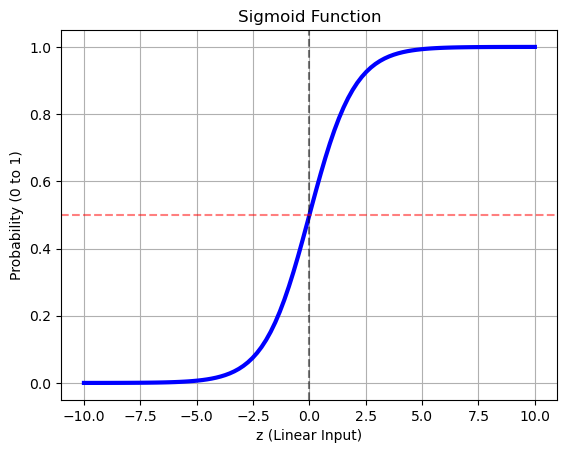

In [17]:
# step 3 : visualoze of sigmoid
def sigmoid(z):
    
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z), color='blue', linewidth=3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5)
plt.title("Sigmoid Function")
plt.xlabel("z (Linear Input)")
plt.ylabel("Probability (0 to 1)")
plt.grid(True)
plt.show()

In [23]:
# step 3 preprocseeing

# 1. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. scale data Mean = 0 , Std = 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#3. Train Logistic Regression
log_reg = LogisticRegression(random_state=42, solver='liblinear') 
log_reg.fit(X_train_scaled, y_train)

# 4. Prediction
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

Accuracy: 0.9825

Classification Report:

              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        43
      benign       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



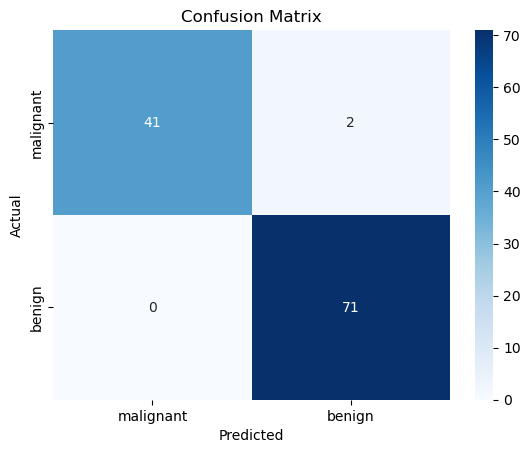

In [25]:
# step 4 : Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

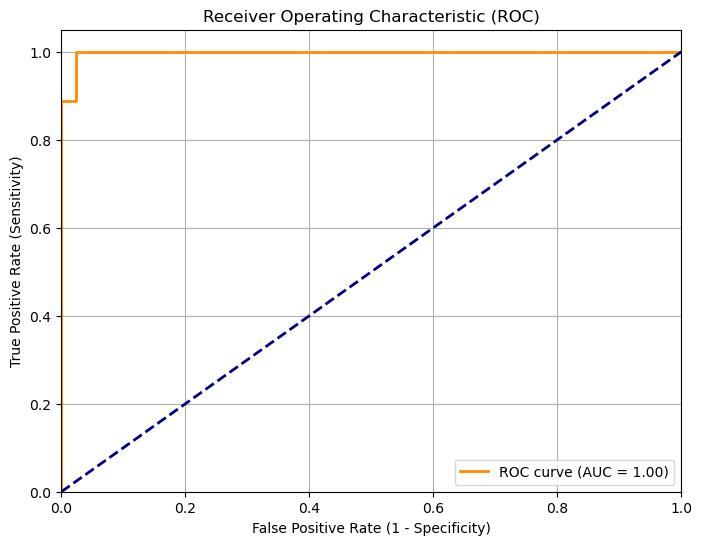

Area Under Curve (AUC): 0.9974


In [27]:
# step 5 ROC Curve
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC Score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Diagonal line (Random Guess)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print(f"Area Under Curve (AUC): {auc_score:.4f}")
